# Introduction
The predictors of hospital mortality in patients admitted to intensive care units remain poorly characterized.

My objective is to develop and validate a predictive model for overall hospital mortality in patients hospitalized in intensive care units. I trained different models: Random Forest Classifier, AdaBoost Classifier, SVC, KNeighbors Classifier, GaussianNB, Logistic Regression, XGB Classifier, and LGBM Classifier. I also used SMOTE, which is an oversampling model, because the ratio of the target variables was disproportionate.

These data originate from the Global Open Source Severity of Illness Score (GOSSIS) initiative by MIT and were collected in the United States in 2021.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report,recall_score,make_scorer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [ ]:
pd.set_option('display.max_row', 9000)
pd.set_option('display.max_column', 200)

In [ ]:
data = pd.read_csv('/content/dataPT2.csv', sep = ';',decimal=',')
df = data.copy()
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,113303,63835,185,77.0,26.822874,0,African American,M,172.7,Accident & Emergency,711,admit,CCU-CTICU,0.197222,80.0,109.0,108.01,0,0.0,4.0,6.0,0.0,5.0,102.0,0.0,127.0,57.0,36.40,0.0,85.0,69.0,85.0,69.0,94.0,79.0,115.0,91.0,115.0,91.0,33.0,22.0,99.0,97.0,162.0,129.0,162.0,129.0,36.70,36.40,85.0,85.0,85.0,85.0,94.0,94.0,115.0,115.0,115.0,115.0,22.0,22.0,97.0,97.0,162.0,162.0,162.0,162.0,95.0,95.0,4.5,4.5,0.04,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
1,100799,68271,6,19.0,22.890904,0,Asian,M,167.6,Accident & Emergency,915,admit,Med-Surg ICU,0.426389,64.3,122.0,703.03,0,0.0,4.0,5.0,0.0,1.0,46.0,0.0,69.0,7.0,36.50,0.0,101.0,52.0,101.0,52.0,98.0,46.0,110.0,64.0,110.0,64.0,28.0,0.0,100.0,79.0,140.0,82.0,140.0,82.0,37.10,36.50,101.0,101.0,101.0,101.0,77.0,69.0,110.0,110.0,110.0,110.0,22.0,15.0,99.0,94.0,121.0,121.0,121.0,121.0,84.0,84.0,3.5,3.5,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
2,97702,25893,77,49.0,33.855754,0,Caucasian,F,167.6,Accident & Emergency,113,admit,Med-Surg ICU,0.002778,95.1,122.0,703.03,0,0.0,4.0,6.0,0.0,5.0,110.0,0.0,125.0,48.0,36.60,0.0,83.0,62.0,83.0,62.0,100.0,71.0,119.0,89.0,119.0,89.0,44.0,12.0,98.0,91.0,186.0,126.0,186.0,126.0,36.90,36.60,82.0,62.0,82.0,62.0,100.0,82.0,112.0,89.0,112.0,89.0,44.0,12.0,97.0,91.0,154.0,127.0,154.0,127.0,134.0,121.0,3.7,3.2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,66955,4599,19,52.0,36.358025,0,African American,F,180.0,Accident & Emergency,657,admit,CCU-CTICU,0.152778,117.8,112.0,107.01,0,0.0,4.0,6.0,0.0,5.0,52.0,0.0,133.0,30.0,36.66,0.0,104.0,63.0,104.0,63.0,74.0,52.0,114.0,78.0,114.0,78.0,25.0,10.0,100.0,89.0,159.0,115.0,159.0,115.0,37.05,36.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,80.0,3.5,3.5,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,90681,1541,132,83.0,29.277836,0,Caucasian,F,152.4,Accident & Emergency,499,admit,Med-Surg ICU,0.050000,68.0,115.0,101.01,0,0.0,4.0,6.0,0.0,1.0,56.0,0.0,154.0,33.0,35.60,1.0,92.0,38.0,92.0,38.0,79.0,58.0,83.0,83.0,83.0,83.0,28.0,12.0,100.0,87.0,181.0,100.0,181.0,100.0,36.80,35.60,60.0,38.0,60.0,38.0,79.0,60.0,83.0,83.0,83.0,83.0,23.0,12.0,100.0,99.0,137.0,100.0,137.0,100.0,320.0,129.0,4.9,4.6,0.48,0.37,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0


# EDA

In [ ]:
df.shape

(82542, 84)

On a 82542 observation et 84 variables

In [ ]:
df.dtypes.value_counts()

float64    70
int64       7
object      7
dtype: int64

We have 7 variables of type Object; they are most likely categorical variables.

<Axes: >

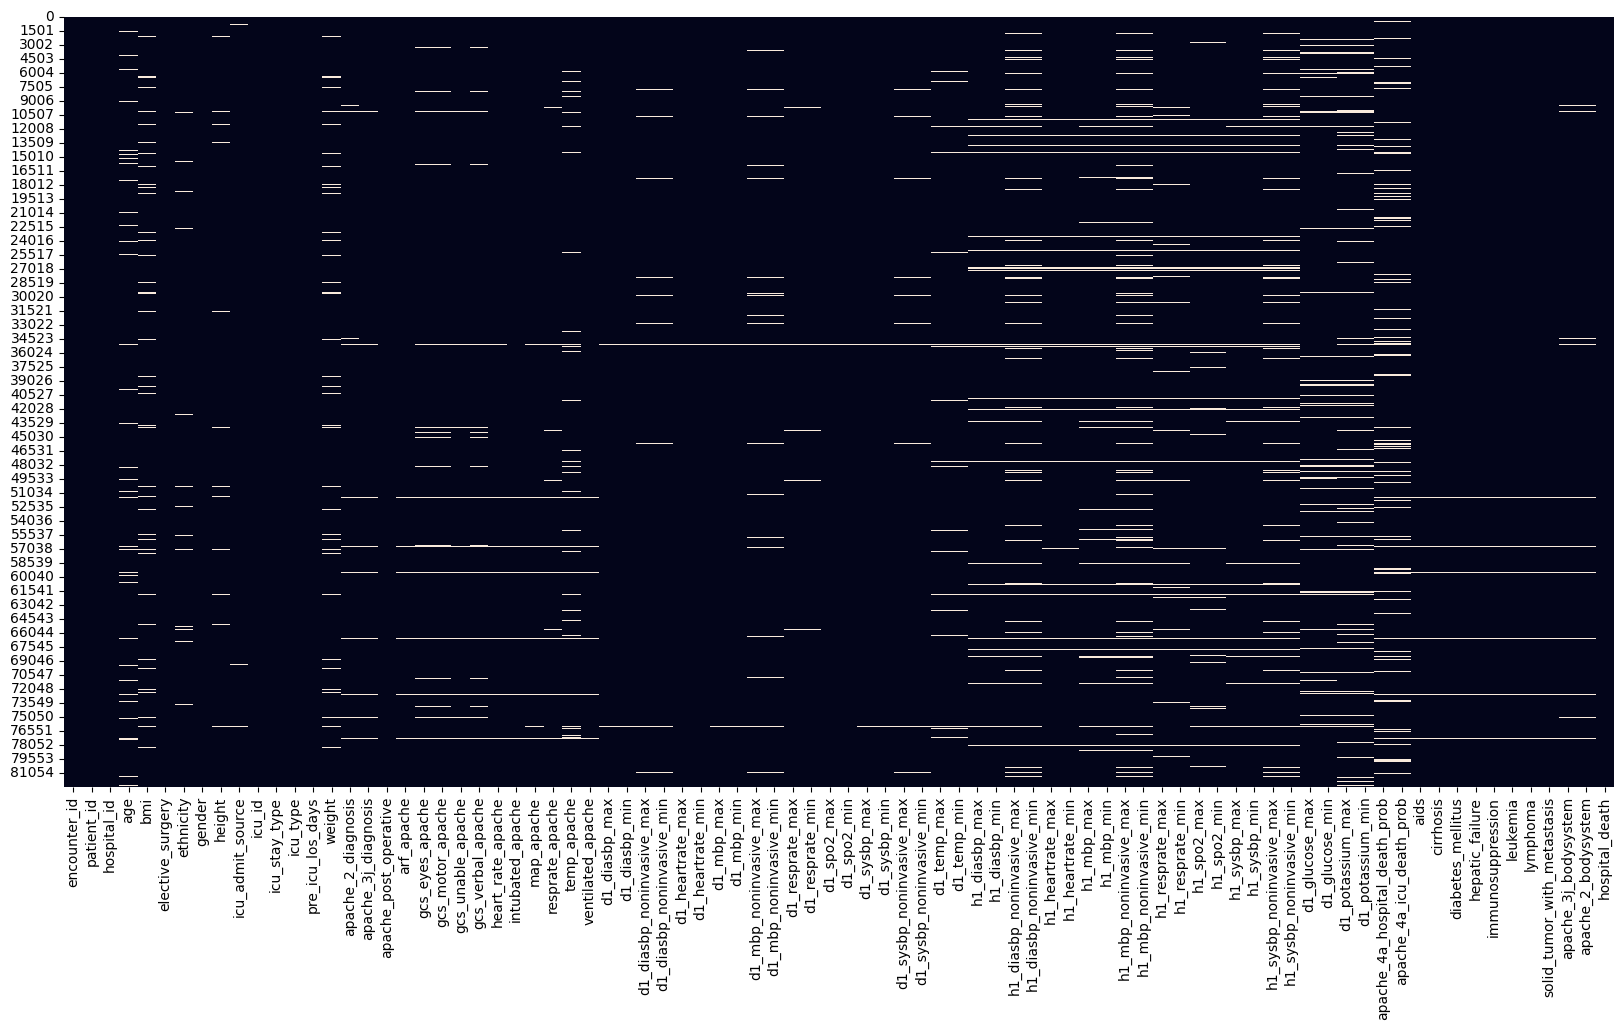

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Les variables avec le pourçentage de valeur absente le plus elevé sont : h1_resprate_min,                 
h1_resprate_max,                  
h1_mbp_min,                      
h1_mbp_max,                       
d1_glucose_max,                   
d1_glucose_min,                   
h1_sysbp_noninvasive_min,         
h1_sysbp_noninvasive_max,         
h1_diasbp_noninvasive_max,        
h1_diasbp_noninvasive_min,        
apache_4a_hospital_death_prob,    
apache_4a_icu_death_prob,         
h1_mbp_noninvasive_min,           
h1_mbp_noninvasive_max,           
d1_potassium_min,                
d1_potassium_max

In [ ]:
df['hospital_death'].value_counts()

0    75392
1     7150
Name: hospital_death, dtype: int64

Our target variable is unbalanced; we only have 10% of values as 1, indicating deaths in our hospital_death variable.






In [ ]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,82542.000000,82542.000000,82542.000000,78711.000000,79453.000000,82542.000000,81329.000000,82542.000000,82542.000000,80091.000000,81054.000000,81550.000000,82542.000000,81893.000000,80830.000000,80830.000000,81606.000000,80830.000000,81749.000000,81893.000000,81646.000000,81428.000000,78875.000000,81893.000000,82397.000000,82397.000000,81614.000000,81614.000000,82416.000000,82416.000000,82348.000000,82348.000000,81215.000000,81215.000000,82201.000000,82201.000000,82242.000000,82242.000000,82402.000000,82402.000000,81626.000000,81626.000000,80476.000000,80476.000000,79298.000000,79298.000000,75913.000000,75913.000000,80045.000000,80045.000000,78401.000000,78401.000000,74375.000000,74375.000000,78625.000000,78625.000000,78768.000000,78768.000000,79304.000000,79304.000000,75920.000000,75920.000000,77323.000000,77323.000000,73935.000000,73935.000000,75371.000000,75371.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,82542.000000
mean,65622.992016,65529.454460,105.750672,62.332762,29.180924,0.183652,169.655123,508.301883,0.836987,84.040713,185.363091,558.156448,0.201231,0.027963,3.463479,5.469096,0.009509,3.991488,99.671580,0.151295,87.930076,25.818446,36.413920,0.325828,88.454968,50.134362,88.571213,50.217745,103.018892,70.338065,104.606888,64.844186,104.546094,64.917417,28.889040,12.848396,99.241349,90.451947,148.319410,96.916337,148.214932,96.988165,37.284202,36.268044,75.306578,62.782895,75.763637,63.221306,92.259454,83.708989,91.577748,79.352075,91.568511,79.668733,22.644299,17.220197,98.044587,95.175173,133.219131,116.320085,133.028872,116.515437,174.766990,114.376330,4.252481,3.934227,0.087333,0.044395,0.000867,0.015642,0.225611,0.012919,0.026449,0.007180,0.004249,0.020368,0.086623
std,37811.749680,37775.860453,62.867370,16.760189,8.273103,0.387202,10.796333,229.036238,2.506339,25.045053,86.020273,463.013344,0.400923,0.164869,0.952728,1.290224,0.097050,1.561818,30.880751,0.358338,42.016075,15.096428,0.834248,0.468686,19.777548,13.305424,19.770786,13.329586,22.030745,17.085988,20.772812,15.668850,20.659106,15.688709,10.692376,5.051832,1.811547,10.057425,25.713695,20.674895,25.771730,20.702575,0.692993,0.745909,18.406953,16.355139,18.483417,16.416565,21.836828,20.280018,20.527744,19.129706,20.558242,19.239959,7.518393,6.087604,3.231712,6.619463,27.566947,26.547117,27.694976,26.661617,86.850841,38.210161,0.668018,0.579193,0.247285,0.217298,0.029432,0.124088,0.417987,0.112927,0.160468,0.084431,0.065050,0.141257,0.281283
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,0.000000,46.00

icu_id' and 'patient_id' are simply IDs and do not provide any new information; they are just noise.
'apache_4a_icu_death_prob' and 'apache_4a_hospital_death_prob' are probabilities and could bias our model.


In [ ]:
colonnes_a_supprimer = ['ethnicity','icu_id', 'patient_id','apache_4a_icu_death_prob','apache_4a_hospital_death_prob']

df = df.drop(colonnes_a_supprimer, axis=1)


In [ ]:
#Division of the variable

columns_binaire = ['elective_surgery', 'apache_post_operative','arf_apache',
                   'intubated_apache','gcs_unable_apache','intubated_apache',
                   'ventilated_apache','aids', 'cirrhosis', 'diabetes_mellitus' , 'hepatic_failure' ,
                   'immunosuppression' , 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']

coloumn_category_toute= ['icu_admit_source','icu_stay_type', 'icu_type',
                         'apache_3j_bodysystem','apache_2_bodysystem','gcs_eyes_apache',
                         'gcs_motor_apache','gcs_verbal_apache','elective_surgery','gender', 'apache_post_operative','arf_apache',
                   'intubated_apache','gcs_unable_apache','intubated_apache',
                   'ventilated_apache','aids', 'cirrhosis', 'diabetes_mellitus' , 'hepatic_failure' ,
                   'immunosuppression' , 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']
column_category_string = ['icu_admit_source','gender','icu_stay_type', 'icu_type','apache_3j_bodysystem','apache_2_bodysystem']




In [ ]:
df.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache

In [ ]:
columns_categorielle_ordonnée = ['gcs_eyes_apache',	'gcs_motor_apache','gcs_verbal_apache']

Visualization of the correlation between continuous quantitative variables.



In [ ]:
colonnes_float = ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'heart_rate_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min']


In [ ]:
corr_matrix = df.corr()

<ipython-input-209-9f52c1cafd3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


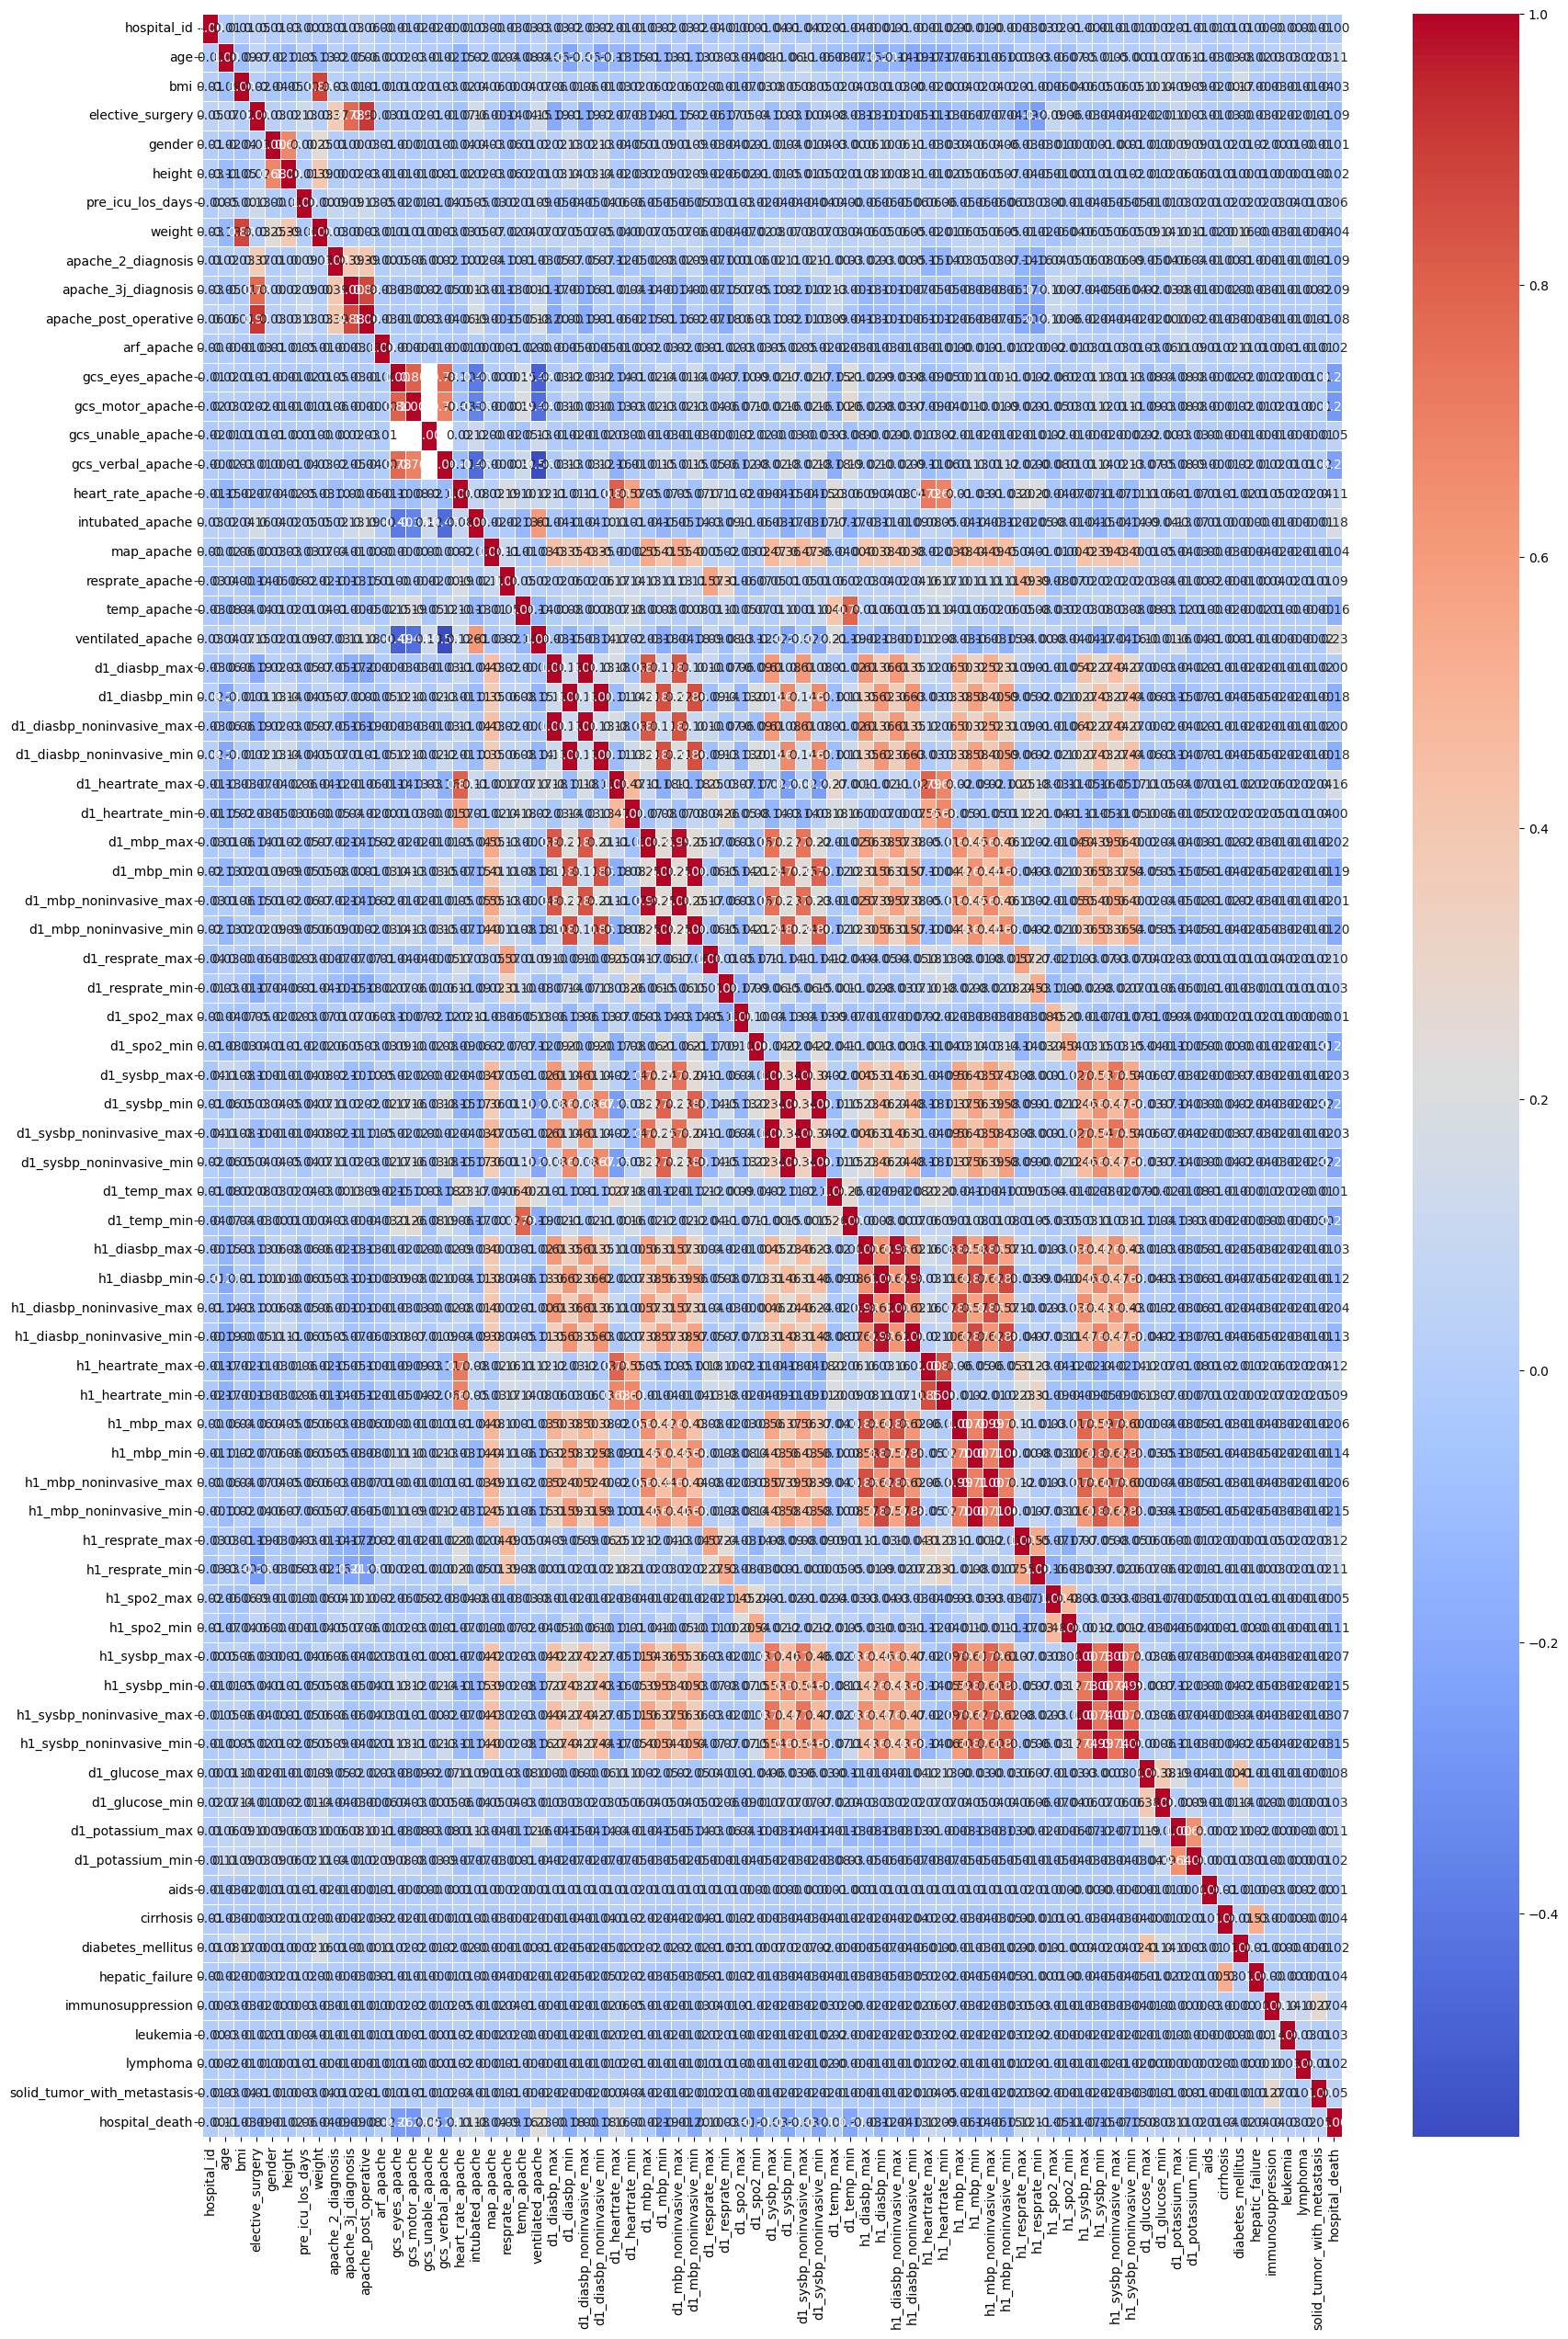

In [ ]:
plt.figure(figsize=(20, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
seuil_correlation = 0.99

# Trouver les colonnes avec une corrélation supérieure au seuil
colonnes_correlees = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > seuil_correlation:
            colonne_i = corr_matrix.columns[i]
            colonne_j = corr_matrix.columns[j]

            # Calculer les corrélations absolues avec toutes les autres colonnes
            corr_i = corr_matrix[abs(corr_matrix[colonne_i]) > seuil_correlation].index.tolist()
            corr_j = corr_matrix[abs(corr_matrix[colonne_j]) > seuil_correlation].index.tolist()

            # Identifier la colonne avec la corrélation la plus élevée
            colonne_a_supprimer = colonne_i if len(corr_i) > len(corr_j) else colonne_j

            colonnes_correlees.add(colonne_a_supprimer)

# Supprimer les colonnes corrélées du DataFrame
df_sans_correlation = df.drop(columns=colonnes_correlees)

In [ ]:
df_sans_correlation.shape

(82542, 71)

We tried preprocessing and training on this new dataset with fewer variables, but it did not significantly improve our score. Therefore, we decided to keep all our variables.

# Preprocessing and model training.

In [ ]:
X=df.drop('hospital_death',axis=1)
y=df['hospital_death']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:


models = {
    'Adaboost': AdaBoostClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(),
    'KNN' : KNeighborsClassifier(),
    'GNB' : GaussianNB(),
    'RFC':RandomForestClassifier()
}
for name, model in models.items():
    print(f"Testing {name}...")

    # Create pipeline with SMOTE
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', model)
    ])

    # Fit pipeline
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluation
    print(classification_report(y_test, y_pred))
    print("="*50)

Testing Adaboost...
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15019
           1       0.48      0.36      0.41      1490

    accuracy                           0.91     16509
   macro avg       0.71      0.66      0.68     16509
weighted avg       0.90      0.91      0.90     16509

Testing DecisionTree...
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15019
           1       0.30      0.37      0.33      1490

    accuracy                           0.87     16509
   macro avg       0.62      0.64      0.63     16509
weighted avg       0.88      0.87      0.87     16509

Testing LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.72      0.83     15019
           1       0.20      0.71      0.32      1490

    accuracy                           0.72     16509
   macro avg       0.58      0.72      0.57     16509
weighted avg       0.89      0.72      0.78     16509

Testing XGBoost...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15019
           1       0.66      0.34      0.45      1490

    accuracy                           0.92     16509
   macro avg       0.80      0.66      0.71     16509
weighted avg       0.91      0.92      0.91     16509

Testing LGBM...
[LightGBM] [Info] Number of positive: 60373, number of negative: 60373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

We can see that XGBoost has the best score along with LGBM. We have chosen to test XGBoost (We conducted some trials with LGBM as well, but it would be too much to include all the details here).

In [ ]:
# Define parameter grid
param_grid = {
    'classifier__learning_rate': [0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__n_estimators': [100, 200, 300],
    # Add more hyperparameters if needed
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline1, param_grid, cv=5, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Get best estimator
best_estimator = grid_search.best_estimator_

# Predict
y_pred = best_estimator.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

Best parameters: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 4, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15019
           1       0.67      0.35      0.46      1490

    accuracy                           0.93     16509
   macro avg       0.80      0.67      0.71     16509
weighted avg       0.91      0.93      0.92     16509



# Training a DummyClassifier.


81202    0
13639    0
24932    0
72843    0
56887    0
        ..
59723    0
44027    0
77946    0
64756    0
72378    1
Name: hospital_death, Length: 16509, dtype: int64 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15019
           1       0.00      0.00      0.00      1490

    accuracy                           0.91     16509
   macro avg       0.45      0.50      0.48     16509
weighted avg       0.83      0.91      0.87     16509



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


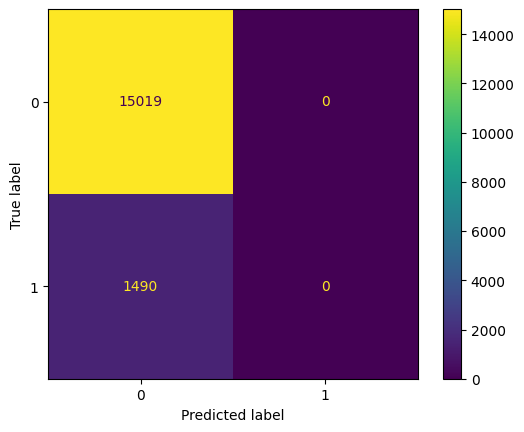

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier

# Create a dummy classifier with the 'most_frequent' strategy
dummy_classifier = DummyClassifier(strategy='most_frequent')
# Fit the dummy classifier to the training data
dummy_classifier.fit(X_train, y_train)
# Make predictions on new data
predDummy = dummy_classifier.predict(X_test)
confusion_matrixDummy = confusion_matrix( y_test, predDummy)
# Create the ConfusionMatrixDisplay object
confusion_matrix_dummy_display = ConfusionMatrixDisplay(confusion_matrixDummy,
display_labels=["0", "1"])
# Plot the confusion matrix
confusion_matrix_dummy_display.plot()
print(y_test, predDummy)
print(classification_report(y_test, predDummy))

Re-training XGBoost with the hyperparameters found using grid search (we were unable to redo the grid search as it took too much time; we performed it once).

In [ ]:
pipeline2 = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', XGBClassifier(learning_rate=0.3, max_depth= 4, min_child_weight=1, n_estimators = 200))
    ])

In [ ]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apa...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [ ]:

  y_pred = pipeline2.predict(X_test)

  print(classification_report(y_test, y_pred))
  print("="*50)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15019
           1       0.67      0.35      0.46      1490

    accuracy                           0.93     16509
   macro avg       0.81      0.67      0.71     16509
weighted avg       0.91      0.93      0.92     16509



# Determination of the best threshold


In [ ]:
y_prob = pipeline2.predict_proba(X_test)[:, 1]
from sklearn.metrics import accuracy_score
# Adjusting the classification threshold (for example, changing from 0.5 to 0.3).
threshold = 0.3
y_pred_adjusted = (y_prob > threshold).astype(int)

# Evaluating the performance with the new threshold
new_recall = recall_score(y_test, y_pred_adjusted)
print(f"Recall ajusté : {new_recall * 100:.2f}%")



# Evaluating the model's accuracy
accuracy = classification_report(y_test, y_pred_adjusted)
print(accuracy)
accuracy2 = accuracy_score(y_test, y_pred_adjusted)
print(accuracy2)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
conf_matrix

Recall ajusté : 51.28%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15019
           1       0.53      0.51      0.52      1490

    accuracy                           0.91     16509
   macro avg       0.74      0.73      0.74     16509
weighted avg       0.91      0.91      0.91     16509

0.9142891756011873


array([[14330,   689],
       [  726,   764]])

We have an AUC of 0.89.


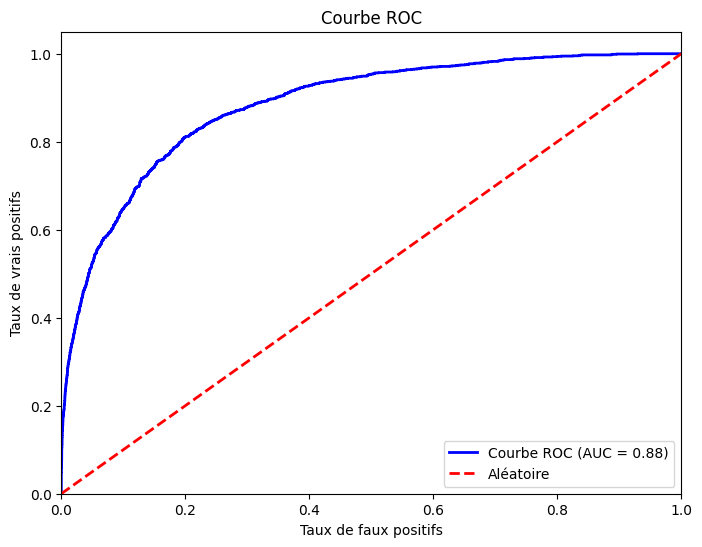

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_pred_proba = pipeline2.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Displaying the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Aléatoire')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

